<a href="https://colab.research.google.com/github/nata0875/created_github/blob/main/kalustovaDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Books recommendation system.**

Datasets were taken from Kaggle. Online data for books from Amazon along with user ratings and users who bought them. 3 files csv.  Ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation).
https://www.kaggle.com/datasets/saurabhbagchi/books-dataset/download?datasetVersionNumber=1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [2]:
books_raw = pd.read_csv("books.csv", sep=";", on_bad_lines = 'skip', encoding='latin-1')
ratings = pd.read_csv("ratings.csv", sep=";", on_bad_lines = 'skip', encoding='latin-1')
users = pd.read_csv("users.csv", sep=";", on_bad_lines = 'skip', encoding='latin-1')

<ipython-input-2-19c1adbe25f4>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_raw = pd.read_csv("books.csv", sep=";", on_bad_lines = 'skip', encoding='latin-1')


In [3]:
# Understand the Schema and purpose
# Look at the size and format of the Data
print(books_raw.shape)
books_raw.head()


(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books_raw.dtypes
books = books_raw.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1)
books.rename(columns={'Book-Title': 'Title','Book-Author': 'Author','Year-Of-Publication': 'PublYear'}, inplace=True)
books.head()


,ISBN,Title,Author,PublYear,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
print(ratings.shape)
ratings.rename(columns={'Book-Rating': 'Rating','User-ID': 'UserID'}, inplace=True)
ratings.head()

(1149780, 3)


,UserID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(users.shape)
users.rename(columns={'User-ID': 'UserID'}, inplace=True)
users.head()

(278858, 3)


,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
#Look the summary of the dataset's structure
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   Title      271360 non-null  object
 2   Author     271359 non-null  object
 3   PublYear   271360 non-null  object
 4   Publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   UserID  1149780 non-null  int64 
 1   ISBN    1149780 non-null  object
 2   Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


books:
There are 271,360 rows with index values ranging from 0 to 271,359, 5 columns with special names,3 missing values, estimated memory usage is 10,4+MB, still small.

ratings:
There are 1149780 rows with index values ranging from 0 to 1,149,779, 3 columns with special names,not missing values, estimated memory usage is 26,3+MB.

users:
There are 278,858 rows with index values ranging from 0 to 278,857, 3 columns with special names, the "Age" column has 110,762 missing values and float type, estimated memory usage is 6,4+MB, not memory-intensive.



**Analyzing and cleaning BOOKS dataset**
1. Cleaning Year of Publication column values : make it integer, cleaning mistakes.
2. Cleaning some mistakes and missing values in Title and Author, Publisher columns.

In [10]:
print('books:\n',books.dtypes)

books:
 ISBN         object
Title        object
Author       object
PublYear     object
Publisher    object
dtype: object


In [11]:
#Let's look at PublYear. Do it integer.
print('Year of publication',books['PublYear'].unique())

Year of publication [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940'

In [12]:
# Count occurrences of 'DK Publishing Inc' and 'Gallimard'
counts = books['PublYear'].isin(['DK Publishing Inc', 'Gallimard']).sum()

# Display the count
print(f"Count of 'DK Publishing Inc' and 'Gallimard': {counts}")

# Display the rows where these values occur
rows_with_values = books[books['PublYear'].isin(['DK Publishing Inc', 'Gallimard'])]
print("\nRows with 'DK Publishing Inc' and 'Gallimard':")
print(rows_with_values)


Count of 'DK Publishing Inc' and 'Gallimard': 3

Rows with 'DK Publishing Inc' and 'Gallimard':
              ISBN                                              Title Author  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   2000   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   2003   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   2000   

                 PublYear                                          Publisher  
209538  DK Publishing Inc  http://images.amazon.com/images/P/078946697X.0...  
220731          Gallimard  http://images.amazon.com/images/P/2070426769.0...  
221678  DK Publishing Inc  http://images.amazon.com/images/P/0789466953.0...  


Since the year of publication was mistakengly inserted into Author column, let's correct it

In [13]:
rows_to_swap = [209538, 220731, 221678]
# Swap values between "PublYear" and "Publisher" for the specified rows
books.loc[rows_to_swap, 'Publisher'] = books.loc[rows_to_swap, 'PublYear']
books.loc[rows_to_swap, 'PublYear'] = books.loc[rows_to_swap, 'Author']
selected_rows = books.loc[rows_to_swap]
print(selected_rows)

              ISBN                                              Title Author  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   2000   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   2003   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   2000   

       PublYear          Publisher  
209538     2000  DK Publishing Inc  
220731     2003          Gallimard  
221678     2000  DK Publishing Inc  


In [14]:
pd.set_option('display.max_colwidth', None)
books.loc[rows_to_swap]['Title']

209538           DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
220731                                       Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
221678    DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
Name: Title, dtype: object

In [15]:
hh=books['Author'].unique()
author_to_check = 'Jean-Marie Gustave Le ClÃ?Â©zio'

if author_to_check in hh:
    print(f'{author_to_check} is in the array.')
else:
    print(f'{author_to_check} is not in the array.')

Jean-Marie Gustave Le ClÃ?Â©zio is in the array.


In [16]:
# List of new values for 'Title' and 'Author'
new_titles = ['DK Readers Creating the X-Men How It All Began (Level 4: Proficient Readers)', 'Peuple du ciel, suivi de Les Bergers', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)']
new_authors = ['Michael Teitelbaum', 'Jean-Marie Gustave Le ClÃ?Â©zio','James Buckley']

# Manually set values for 'Title' and 'Author' columns using lists
books.loc[rows_to_swap, 'Title'] = new_titles
books.loc[rows_to_swap, 'Author'] = new_authors
print(books.loc[rows_to_swap])

              ISBN  \
209538  078946697X   
220731  2070426769   
221678  0789466953   

                                                                                             Title  \
209538                DK Readers Creating the X-Men How It All Began (Level 4: Proficient Readers)   
220731                                                        Peuple du ciel, suivi de Les Bergers   
221678  DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)   

                                 Author PublYear          Publisher  
209538               Michael Teitelbaum     2000  DK Publishing Inc  
220731  Jean-Marie Gustave Le ClÃ?Â©zio     2003          Gallimard  
221678                    James Buckley     2000  DK Publishing Inc  


In [17]:
#Change publication year into integer
books['PublYear'] = books['PublYear'].astype(int)

In [18]:
# checking null values and correct them if possible
null_values = books[books[['Author', 'PublYear', 'Publisher']].isnull().any(axis=1)]

# Display rows with null values
print(null_values)

              ISBN                                                     Title  \
128890  193169656X                                               Tyrant Moon   
129037  1931696993                                           Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Personal Wealth   

                 Author  PublYear                       Publisher  
128890  Elaine Corvidae      2002                             NaN  
129037  Linnea Sinclair      2001                             NaN  
187689              NaN      1995  Edinburgh Financial Publishing  


In [19]:
pp=books['Publisher'].unique()
publisher_to_check = 'CreateSpace Independent Publishing Platform'

if author_to_check in hh:
    print(f'{publisher_to_check} is in the array.')
else:
    print(f'{publisher_to_check} is not in the array.')

rows_to_change = [128890, 129037]
# List of new values for  'Publisher'
new_publishers = ['NovelBooks, Inc.', 'CreateSpace Independent Publishing Platform']

# Manually set values for 'Publisher'
books.loc[rows_to_change, 'Publisher'] = new_publishers
books = books.drop(187689)
print(books.loc[rows_to_change])
books.info()

CreateSpace Independent Publishing Platform is in the array.
              ISBN            Title           Author  PublYear  \
128890  193169656X      Tyrant Moon  Elaine Corvidae      2002   
129037  1931696993  Finders Keepers  Linnea Sinclair      2001   

                                          Publisher  
128890                             NovelBooks, Inc.  
129037  CreateSpace Independent Publishing Platform  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 271359 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271359 non-null  object
 1   Title      271359 non-null  object
 2   Author     271359 non-null  object
 3   PublYear   271359 non-null  int64 
 4   Publisher  271359 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.5+ MB


**Analyzing and cleaning USERS dataset**

1. Age column has a lot of missing values, some  unreasonable values,like higher than 100. Correcting them. Filling n/a with median values, which influence distribution in significantly. Define a threshold 10 -100. Building some visualization.
2. Defining most reading age bin.

In [20]:
print('users:\n',users.dtypes)

users:
 UserID        int64
Location     object
Age         float64
dtype: object


In [21]:
# Users age is not necessary to be float.Analyze the numbers.
print('Users age',users['Age'].unique())

Users age [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


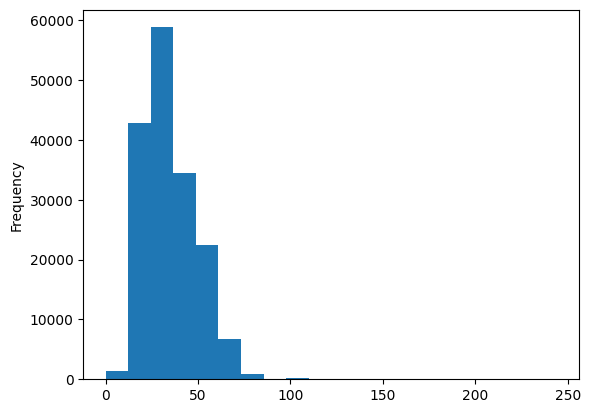

In [22]:
users['Age'].plot(kind='hist', bins=20)
plt.show()


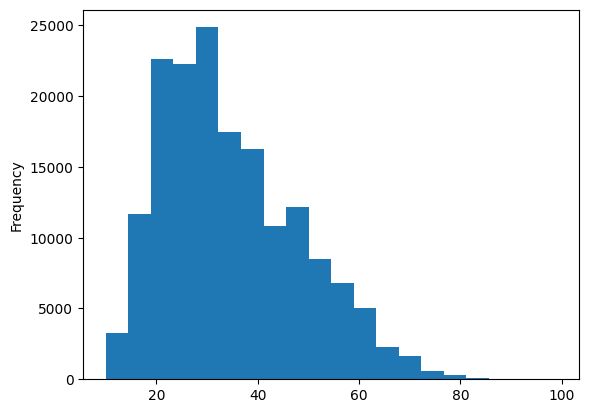

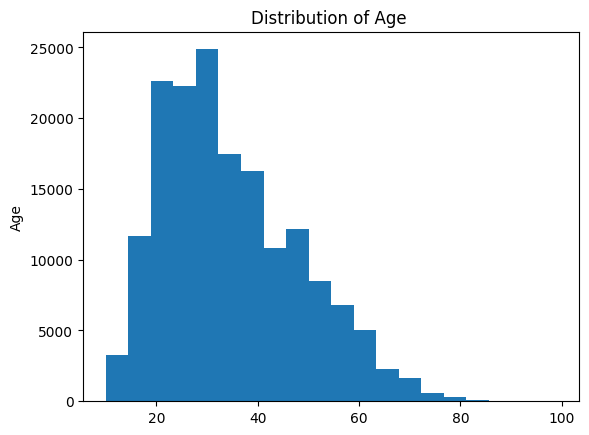

In [23]:
#Some values are above 100,which is unreasonable, let's remove outliers
#Define a threshold 10 -100
users = users[(users['Age'] >= 10) & (users['Age'] < 100)]
users['Age'].plot(kind='hist', bins=20)
plt.show()

#Fill missing values with median.
users['Age'].fillna(users['Age'].median(), inplace=True)

users['Age'].plot(kind='hist', bins=20)
plt.ylabel('Age')
plt.title('Distribution of Age ')
plt.show()
users['Age'] = users['Age'].astype(int)


In [24]:
users.describe()

,UserID,Age
count,166654.000000,166654.000000
mean,139397.928463,34.774383
std,80553.281964,13.603909
min,2.000000,10.000000
25%,69916.250000,24.000000
50%,139358.000000,32.000000
75%,209146.750000,44.000000
max,278855.000000,99.000000


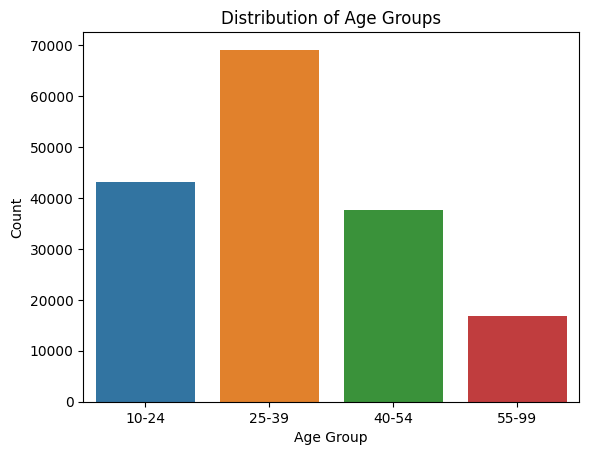

In [25]:
bins = [10, 24, 39, 54, 99]
labels = ['10-24', '25-39', '40-54', '55-99']
users['Age_Group'] = pd.cut(users['Age'], bins=bins, labels=labels)
sns.countplot(x='Age_Group', data=users, order=labels)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')

# Display the plot
plt.show()

The most reading group is 25-39 years.

**Analyzing and cleaning RATINGS Dataset**
1. Visualizing interceptions between users in Ratings and Users dataset.
2. Visualizing interceptions between ISBN(as bookID) in Ratings and Books dataset.
3. Correcting Rating size.
4. Analyzing ratings scope. Dropping ratings =0
5. Understanding some facts about rated books and authors.

In [26]:
print('ratings:\n', ratings.dtypes)
#ratings.describe()

ratings:
 UserID     int64
ISBN      object
Rating     int64
dtype: object


In [27]:
print('unique Users in Rating dataset: ',ratings['UserID'].nunique())
print('unique Users in Users dataset: ',users['UserID'].nunique())

unique Users in Rating dataset:  105283
unique Users in Users dataset:  166654


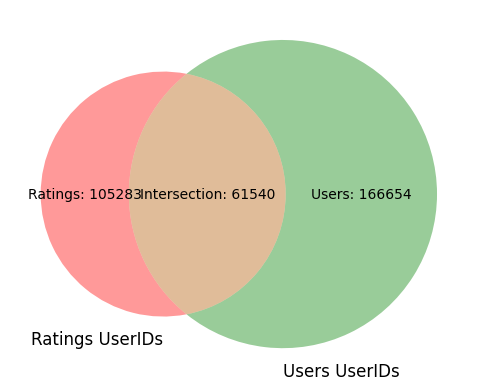

In [28]:
# Get unique UserIDs from each database
ratings_user_ids = set(ratings['UserID'])
users_user_ids = set(users['UserID'])

# Create a Venn diagram for the intersection
venn_diagram = venn2([ratings_user_ids, users_user_ids], set_labels=('Ratings UserIDs', 'Users UserIDs'))

# Add labels to the circles
venn_diagram.get_label_by_id('10').set_text(f"Ratings: {len(ratings_user_ids)}")
venn_diagram.get_label_by_id('01').set_text(f"Users: {len(users_user_ids)}")
venn_diagram.get_label_by_id('11').set_text(f"Intersection: {len(ratings_user_ids.intersection(users_user_ids))}")

# Show the plot
plt.show()


In [29]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271359 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271359 non-null  object
 1   Title      271359 non-null  object
 2   Author     271359 non-null  object
 3   PublYear   271359 non-null  int64 
 4   Publisher  271359 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.5+ MB


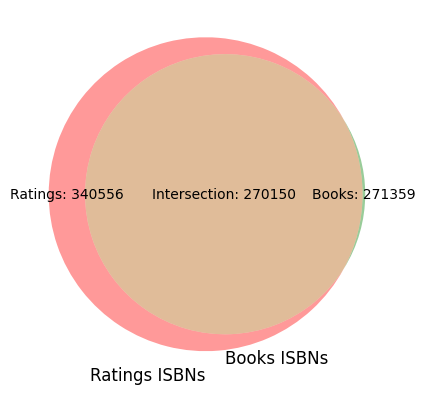

In [30]:
# Get unique ISBNs from each database
ratings_isbns = set(ratings['ISBN'])
books_isbns = set(books['ISBN'])

# Create a Venn diagram for the intersection
venn_diagram_books = venn2([ratings_isbns, books_isbns], set_labels=('Ratings ISBNs', 'Books ISBNs'))

# Add labels to the circles
venn_diagram_books.get_label_by_id('10').set_text(f"Ratings: {len(ratings_isbns)}")
venn_diagram_books.get_label_by_id('01').set_text(f"Books: {len(books_isbns)}")
venn_diagram_books.get_label_by_id('11').set_text(f"Intersection: {len(ratings_isbns.intersection(books_isbns))}")

# Show the plot
plt.show()


In [31]:
ratings_intersected = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_intersected.shape


(1031135, 3)

In [32]:
ratings_intersected_users = ratings_intersected[ratings_intersected.UserID.isin(users.UserID)]
ratings_intersected_users['UserID'].nunique()

53407

In [33]:
# Display unique values in the "Rating" column
unique_ratings = ratings_intersected['Rating'].unique()
print("Unique Ratings:", unique_ratings)


Unique Ratings: [ 0  5  3  6  7  9  8 10  1  4  2]


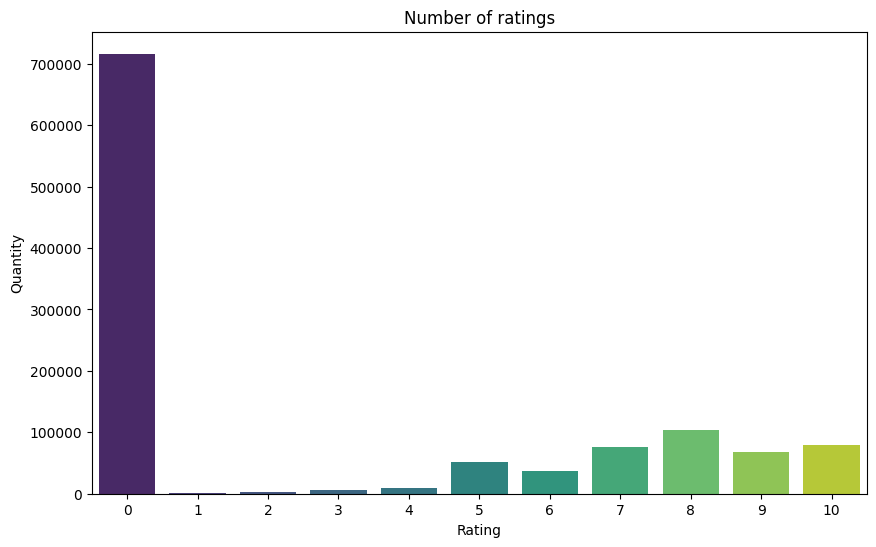

In [34]:
# Bar diagram
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=ratings, palette='viridis')

plt.title('Number of ratings')
plt.xlabel('Rating')
plt.ylabel('Quantity')

plt.show()

In [35]:
rating_counts = ratings['Rating'].value_counts().sort_index()

# transfer into list
rating_list = rating_counts.tolist()

print(rating_list)

[716109, 1770, 2759, 5996, 8904, 50974, 36924, 76457, 103736, 67541, 78610]


In [36]:
ratings_cleaned = ratings_intersected[ratings_intersected['Rating'] != 0]
#print(ratings_cleaned)


In [37]:
ratings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383841 entries, 1 to 1149778
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   UserID  383841 non-null  int64 
 1   ISBN    383841 non-null  object
 2   Rating  383841 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.7+ MB


In [244]:
duplicate_ratings = ratings_cleaned.duplicated(subset=['UserID', 'ISBN', 'Rating'])
print("Duplicates quantity in Ratings:", duplicate_ratings.sum())
duplicate_users = users.duplicated(subset=['UserID'])
print("Duplicates quantity in Users:", duplicate_users.sum())
duplicate_books = books.duplicated(subset=['ISBN'])
print("Duplicates quantity in Books:", duplicate_books.sum())



Duplicates quantity in Ratings: 0
Duplicates quantity in Users: 0
Duplicates quantity in Books: 0


Users in final ratings dataset

In [38]:
common_users = users[users['UserID'].isin(ratings_cleaned['UserID'])]
print("Users in rating_cleaned: ",common_users.shape)


Users in rating_cleaned:  (40184, 4)


In [39]:
# Using  value_counts() to get spreading of values in columns 'UserID'and 'ISBN'
user_counts = ratings_cleaned['UserID'].value_counts()
book_counts = ratings_cleaned['ISBN'].value_counts()

print("Spreading of users:")
print(user_counts)

print("\nSpreading of books:")
print(book_counts)

Spreading of users:
11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
114767       1
114771       1
114772       1
114777       1
276721       1
Name: UserID, Length: 68091, dtype: int64

Spreading of books:
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0060928336    320
             ... 
840804978X      1
8408020854      1
355175537X      1
3551755361      1
0806917695      1
Name: ISBN, Length: 149835, dtype: int64


In [40]:
# Groop by  UserID and count rated books
user_book_counts = ratings_cleaned.groupby('UserID')['ISBN'].count()
user_book_counts_sorted = user_book_counts.sort_values(ascending=False)

print(user_book_counts_sorted)

UserID
11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
135659       1
135660       1
135677       1
135684       1
138845       1
Name: ISBN, Length: 68091, dtype: int64


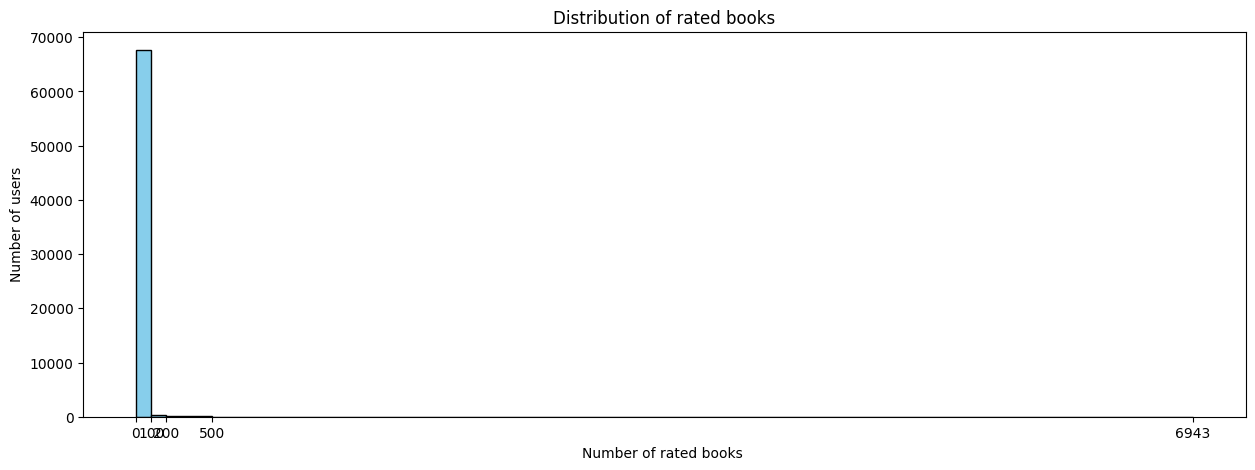

In [41]:
# Building  histogram distribution of rated books
plt.figure(figsize=(15, 5))
plt.hist(user_book_counts, bins=[0, 100, 200, 500, max(user_book_counts)], color='skyblue', edgecolor='black')
plt.xlabel('Number of rated books ')
plt.ylabel('Number of users')
plt.title('Distribution of rated books')
plt.xticks([0, 100, 200, 500, max(user_book_counts)])
plt.show()

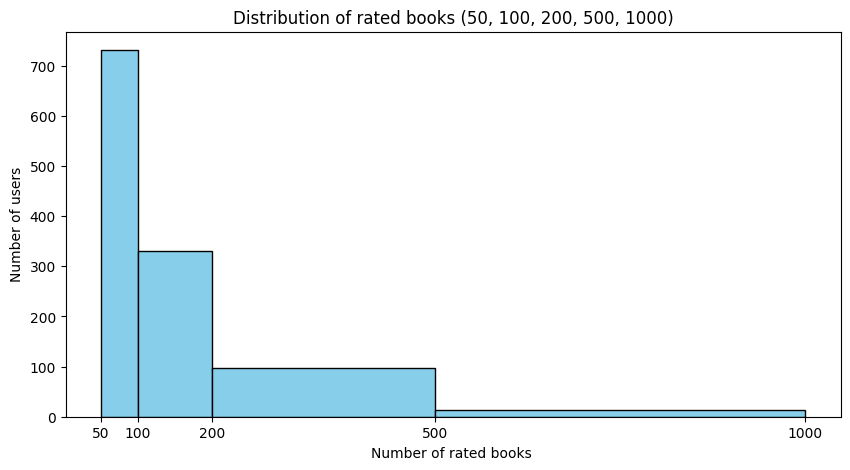

In [42]:
# Let's see the distribution within 1000 books, cutting off the outliers
user_book_counts_filtered = user_book_counts[user_book_counts <= 1000]

#Building histogram of disctribution quantity of rated books
plt.figure(figsize=(10, 5))
plt.hist(user_book_counts_filtered, bins=[50, 100, 200, 500, 1000], color='skyblue', edgecolor='black')
plt.xlabel('Number of rated books ')
plt.ylabel('Number of users')
plt.title('Distribution of rated books (50, 100, 200, 500, 1000)')
plt.xticks([50, 100, 200, 500, 1000])
plt.show()

**Decreasing book quantity**

In [43]:

# taking users,who rated at least 20 books
users_with_20_or_more_books = user_book_counts[user_book_counts >= 20].index

# filter data DF for chosen users
ratings_cleaned_filtered = ratings_cleaned[ratings_cleaned['UserID'].isin(users_with_20_or_more_books)]
ratings_cleaned_filtered.head

<bound method NDFrame.head of          UserID        ISBN  Rating
176      276847  3404145909       8
177      276847  3404148576       8
178      276847  3404921178       7
179      276847  3423071516      10
184      276847  3426671298       8
...         ...         ...     ...
1149743  276688  0836218655      10
1149744  276688  0836236688      10
1149745  276688  0892966548      10
1149746  276688  1551669315       6
1149747  276688  1575660792       7

[217728 rows x 3 columns]>

In [44]:
ratings_cleaned_filtered['UserID'].nunique()

3305

In [45]:
# count book quantity for each author
author_books_count = books['Author'].value_counts().reset_index()
author_books_count.columns = ['Author', 'BookCount']

# top 1000 authors with max books
top_authors = author_books_count.nlargest(1000, 'BookCount')

# Merging books and ratings
merged_data = pd.merge(ratings, books, on='ISBN', how='left')

# filter top 1000 authors
top_authors_data = merged_data[merged_data['Author'].isin(top_authors['Author'])]

# group by autholr and aggregate average rating, total q-ty of ratings and total q-ty of books
authors_ratings = top_authors_data.groupby('Author').agg({
    'Rating': ['mean', 'count'],
    'ISBN': 'nunique'  # Общее количество уникальных книг
}).reset_index()

# Rename columns
authors_ratings.columns = ['Author', 'AverageRating', 'TotalRatings', 'TotalBooks']

print(authors_ratings)


                    Author  AverageRating  TotalRatings  TotalBooks
0              A. A. Milne       3.956835           139          46
1          Agatha Christie       2.862201          2344         631
2             Aimee Thurlo       2.207921           101          35
3         Alan Dean Foster       2.324910           554         128
4             Albert Camus       3.781116           233          51
..                     ...            ...           ...         ...
995     William X. Kienzle       1.244681            94          31
996      Wolfgang Hohlbein       3.551136           176          61
997          Yukio Mishima       4.586667            75          35
998              Zane Grey       1.043011            93          69
999  Zilpha Keatley Snyder       3.198276           116          29

[1000 rows x 4 columns]


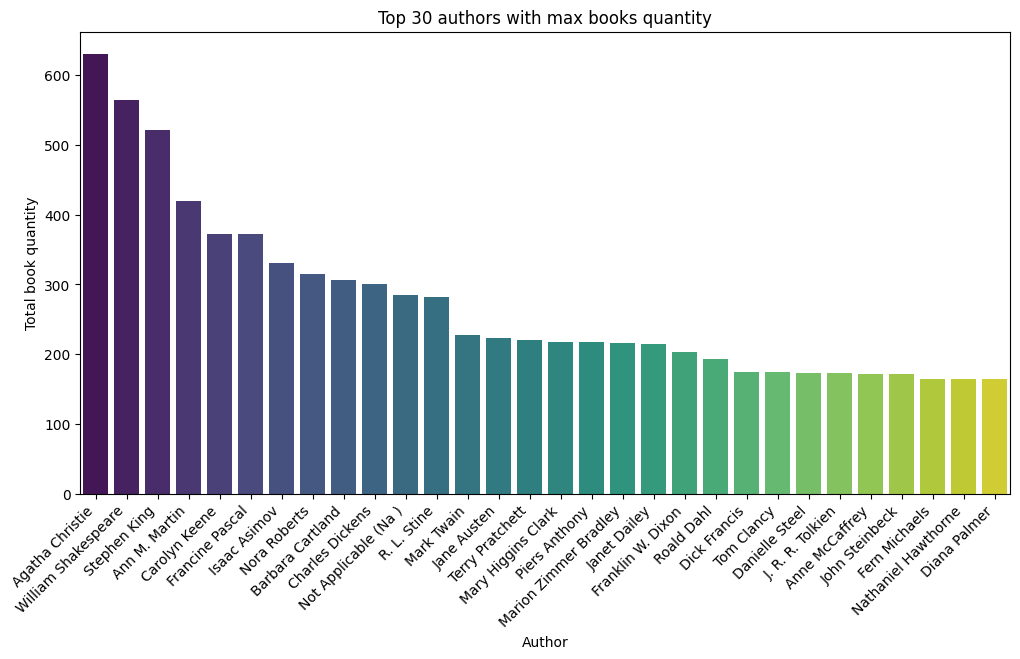

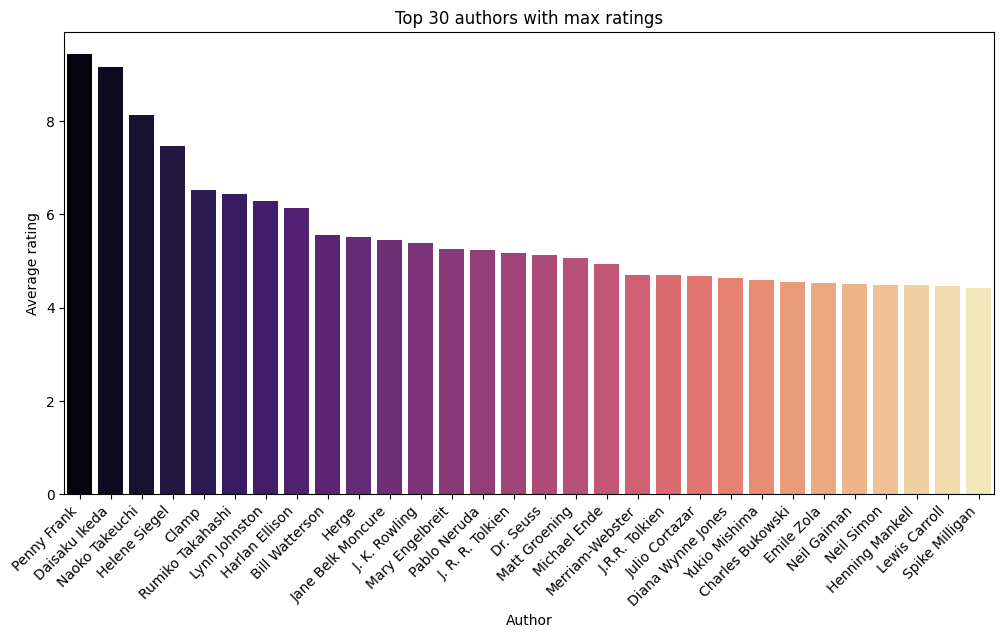

In [46]:
# Sort authors by books quantity descending
top_authors_books = authors_ratings.nlargest(30, 'TotalBooks')

# top 30 authors with max books quantity
plt.figure(figsize=(12, 6))
sns.barplot(x='Author', y='TotalBooks', data=top_authors_books, palette='viridis')
plt.title('Top 30 authors with max books quantity')
plt.xlabel('Author')
plt.ylabel('Total book quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

# sort authors by average rating descending
top_authors_ratings = authors_ratings.nlargest(30, 'AverageRating')

#
plt.figure(figsize=(12, 6))
sns.barplot(x='Author', y='AverageRating', data=top_authors_ratings, palette='magma')
plt.title('Top 30 authors with max ratings')
plt.xlabel('Author')
plt.ylabel('Average rating')
plt.xticks(rotation=45, ha='right')
plt.show()

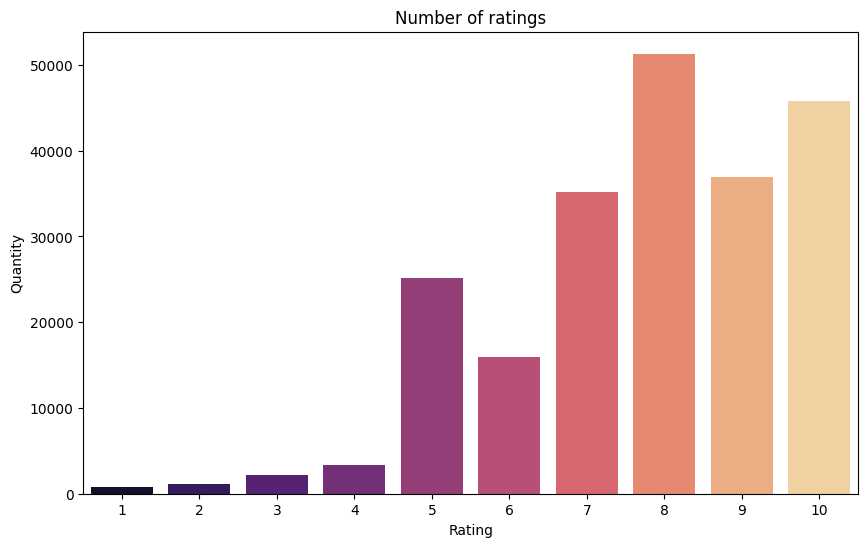

In [55]:
# Bar diagram
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=ratings_cleaned_filtered, palette='magma')

plt.title('Number of ratings')
plt.xlabel('Rating')
plt.ylabel('Quantity')

plt.show()

**RECOMENDATION SYSTEM**

** SVD Analyze**
1. Merging datasets, split data into training /test sets.
2. Creating model, Evaluating model on test set.
3. Making a prediction for definite customer. Analyzing the result.


In [254]:
!pip install scikit-surprise
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from scipy.sparse import csr_matrix
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from surprise import accuracy


In [255]:
# Merging datasets
data = pd.merge(ratings_cleaned_filtered, users, on='UserID')
data = pd.merge(data, books, on='ISBN')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161588 entries, 0 to 161587
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   UserID     161588 non-null  int64   
 1   ISBN       161588 non-null  object  
 2   Rating     161588 non-null  int64   
 3   Location   161588 non-null  object  
 4   Age        161588 non-null  int64   
 5   Age_Group  161567 non-null  category
 6   Title      161588 non-null  object  
 7   Author     161588 non-null  object  
 8   PublYear   161588 non-null  int64   
 9   Publisher  161588 non-null  object  
dtypes: category(1), int64(4), object(5)
memory usage: 12.5+ MB


In [256]:
print('Unique books in dataset:',data['ISBN'].nunique())
print('Unique users in dataset:',data['UserID'].nunique())


Unique books in dataset: 86755
Unique users in dataset: 2515


In [257]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [258]:
# creating matrix for train_data
train_matrix = csr_matrix(pd.pivot_table(train_data, values='Rating', index='UserID', columns='ISBN').fillna(0))

# creating matrix for test_data
test_matrix = csr_matrix(pd.pivot_table(test_data, values='Rating', index='UserID', columns='ISBN').fillna(0))


In [259]:
# creating object Reader
reader = Reader(rating_scale=(1, 10))

# creating data for Surprise
train_data_surprise = Dataset.load_from_df(train_data[['UserID', 'ISBN', 'Rating']], reader)

# Using SVD to teach model
model = SVD()
cross_validate(model, train_data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5011  1.5285  1.5158  1.5181  1.5298  1.5187  0.0104  
MAE (testset)     1.1521  1.1682  1.1563  1.1579  1.1686  1.1606  0.0066  
Fit time          7.82    4.26    2.78    4.05    2.78    4.34    1.85    
Test time         0.37    0.18    0.53    0.51    0.17    0.35    0.16    


{'test_rmse': array([1.50111622, 1.52854944, 1.5157632 , 1.51805339, 1.52978895]),
 'test_mae': array([1.15207764, 1.16821078, 1.15628744, 1.15787194, 1.16863117]),
 'fit_time': (7.820927143096924,
  4.2603538036346436,
  2.77508282661438,
  4.050316095352173,
  2.7819790840148926),
 'test_time': (0.3706996440887451,
  0.1757051944732666,
  0.5272717475891113,
  0.5103249549865723,
  0.16955828666687012)}

In [260]:
# teach model on the training data
trainset = train_data_surprise.build_full_trainset()
model.fit(trainset)

# Get predictions for test data Получение предсказаний для тестового набора
testset = [(row['UserID'], row['ISBN'], row['Rating']) for index, row in test_data.iterrows()]
predictions = model.test(testset)

# Evaluate model
accuracy.rmse(predictions)


RMSE: 1.5166


1.5165980522496034

In [261]:
# Assuming 'predictions' is the list of Prediction objects
predictions_subset = predictions[:100]

# Create a list of lists for tabulation
table_data = [
    ["User ID", "Item ID", "Actual Rating", "Estimated Rating"]
]

for prediction in predictions_subset:
    row = [prediction.uid, prediction.iid, prediction.r_ui, prediction.est]
    table_data.append(row)

# Print the list of lists
for row in table_data:
    print(row)


['User ID', 'Item ID', 'Actual Rating', 'Estimated Rating']
[203240, '0140386645', 10, 7.57925512219969]
[119858, '044990752X', 10, 9.148731655247577]
[223154, '0884861775', 6, 6.990506206286333]
[112083, '0553250043', 10, 8.578641316709048]
[275220, '0060393009', 9, 8.466160081315394]
[39646, '0679783571', 9, 7.7916896123214485]
[78783, '045121174X', 9, 8.490322025294466]
[38023, '0385503857', 9, 9.592080587627422]
[233903, '0553582232', 8, 7.740353400401254]
[63714, '0395850894', 9, 9.4392149558881]
[153723, '0380808315', 7, 6.076769283873669]
[229329, '207053197X', 10, 8.694330198096711]
[243930, '0805068341', 7, 7.467293259621696]
[98391, '050552497X', 8, 8.70232396007685]
[43910, '0375412530', 8, 7.597609362747091]
[190741, '0812016882', 10, 6.6330426442431545]
[171602, '096503240X', 10, 7.712549634405972]
[270820, '044990864X', 6, 6.614102103480149]
[7283, '0553278274', 7, 8.139741658922471]
[184299, '0451186362', 9, 8.223334536491791]
[98391, '1551666952', 8, 9.131706677799192]


In [262]:
user_id = 118533

# get real ratings for the user from the data
user_ratings = ratings_cleaned_filtered[ratings_cleaned_filtered['UserID'] == user_id][['ISBN', 'Rating']]

# create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['ISBN', 'Real_Rating', 'Predicted_Rating'])

# iterate through all the real ratings
for index, row in user_ratings.iterrows():
    book_isbn = row['ISBN']
    real_rating = row['Rating']

    # get the predicted rating
    predicted_rating = model.predict(user_id, book_isbn).est

    # add results to the DataFrame
    temp_df = pd.DataFrame({'ISBN': [book_isbn], 'Real_Rating': [real_rating], 'Predicted_Rating': [predicted_rating]})
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

print(result_df)


          ISBN Real_Rating  Predicted_Rating
0   0060256656          10          9.233901
1   006095616X          10          9.127542
2   0061015725           8          7.879479
3   0061044571           4          6.567567
4   006251380X           3          6.537527
5   0316776963          10          9.310396
6   0345341198           4          6.917017
7   0385234104          10          8.820904
8   0439064864          10          9.778536
9   0439098645          10          9.383546
10  0439139597          10          9.561724
11  0439434564           6          7.464980
12  0440218063           5          7.311619
13  0446395382          10          8.864450
14  0451519124           7          8.482817
15  0452276748          10          8.396986
16  0553265156          10          8.899563
17  0553279475           9          8.396986
18  0590353403          10          9.974318
19  0609805797           8          8.279096
20  0609807420          10          9.137818
21  067175

In [263]:
#Get recommendations for real user
user_id = 118533

# Get the real rating for user from database
user_ratings = data[data['UserID'] == user_id][['ISBN', 'Rating']]

# get 1000 bet rated books
top_n_books = ratings_cleaned_filtered['ISBN'].value_counts().head(1000).index

# Filter books from top 1000
books_not_rated = top_n_books.difference(user_ratings['ISBN'].tolist())

# create DataFrame to keep the recomendations
recommendations_df = pd.DataFrame(columns=['ISBN', 'Title', 'Author', 'Predicted_Rating'])

# Coming through all not rated books
for book_isbn in books_not_rated:
    # get predicted rating
    predicted_rating = model.predict(user_id, book_isbn).est

    # get title
    book_title = books[books['ISBN'] == book_isbn]['Title'].values[0]
    book_author = books[books['ISBN'] == book_isbn]['Author'].values[0]

    # creat temp DataFrame with current recomendation
    temp_df = pd.DataFrame({'ISBN': [book_isbn], 'Title': [book_title],'Author':[book_author], 'Predicted_Rating': [predicted_rating]})

    # add temp df to the main
    recommendations_df = pd.concat([recommendations_df, temp_df], ignore_index=True)

# Sort dataframe
recommendations_df = recommendations_df.sort_values(by='Predicted_Rating', ascending=False)

# take n recomendation
n_recommendations = 10
top_n_recommendations = recommendations_df.head(n_recommendations)

pd.set_option('display.max_colwidth', None)
print(f"Top {n_recommendations}recommended books for user  {user_id}:")
print(top_n_recommendations[['ISBN', 'Title', 'Author','Predicted_Rating']])


Top 10recommended books for user  118533:
           ISBN                                                        Title  \
85   0142001740                                      The Secret Life of Bees   
493  0446310786                                        To Kill a Mockingbird   
697  0553274295                                     Where the Red Fern Grows   
178  0345339738       The Return of the King (The Lord of the Rings, Part 3)   
426  0439136369            Harry Potter and the Prisoner of Azkaban (Book 3)   
288  0380813815  Lamb : The Gospel According to Biff, Christ's Childhood Pal   
177  0345339711               The Two Towers (The Lord of the Rings, Part 2)   
724  0553562738                                                Doomsday Book   
478  0440998050                                            A Wrinkle in Time   
445  0440217563                                                      Voyager   

                Author  Predicted_Rating  
85       Sue Monk Kidd         10.

In [271]:
user_id = 118533

# get real ratings for the user from the data
user_ratings = data[data['UserID'] == user_id][['ISBN', 'Title','Rating']]

# create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['ISBN','Title' ,'Real_Rating', 'Predicted_Rating'])

# iterate through all the real ratings
for index, row in user_ratings.iterrows():
    book_isbn = row['ISBN']
    real_rating = row['Rating']
    book_title = row['Title']

    # get the predicted rating
    predicted_rating = model.predict(user_id, book_isbn).est

    # add results to the DataFrame
    temp_df = pd.DataFrame({'ISBN': [book_isbn], 'Title':[book_title], 'Real_Rating': [real_rating], 'Predicted_Rating': [predicted_rating]})
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

result_df.sort_values(by='Real_Rating',ascending=False)
#print(result_df.sort_values(by='Real_Rating'))


,ISBN,Title,Real_Rating,Predicted_Rating
0,0316776963,Me Talk Pretty One Day,10,9.310396
24,0446395382,Come Play with Me : Games and Toys for Creative Lovers,10,8.864450
27,0553265156,His Way: The Unauthorized Biography of Frank Sinatra,10,8.899563
29,0609807420,The Business Plan for the Body,10,9.137818
31,067178501X,PALMISTRY : HOW TO CHART THE LINES OF YOUR LIFE,10,8.970477
32,0679449329,Practical Intuition: How to Harness the Power of Your Instinct and Make It Work for You,10,9.020145
33,0762409894,LIBRARY OF CLASSIC CHILDREN'S LITERATURE,10,9.051159
35,0764544659,Sushi for Dummies,10,8.396986
37,0764566202,Frommer's(r) Maui 2003,10,8.396986
38,0766607151,Black Beauty (Treasury of Illustrated Classics),10,8.154221
